In [1]:
#this is the method used to measure rosette area from arabidopsis seedlings after they were excised from agar plates and placed
#face up on a sheet of paper.

from plantcv import plantcv as pcv 
# import analyze_area
import cv2
from matplotlib import pyplot as plt
import numpy as np
import cluster_jordan 
import math

# set to "plot" to see image at every step (takes longer)
class options:
    def __init__(self):
        self.image = "./img/original_image.jpg"
        self.debug = "plot"
        self.writeimg= False
        self.result = "vis_tutorial_results.json"
        self.outdir = "." # Store the output to the current directory
        
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug
pcv.params.text_size = 3
pcv.params.text_thickness = 3
pcv.params.dpi=200

In [2]:
imagelink = f"./test_images/on_paper/paper.jpg"
image = cv2.imread(imagelink)
shape = np.shape(image)

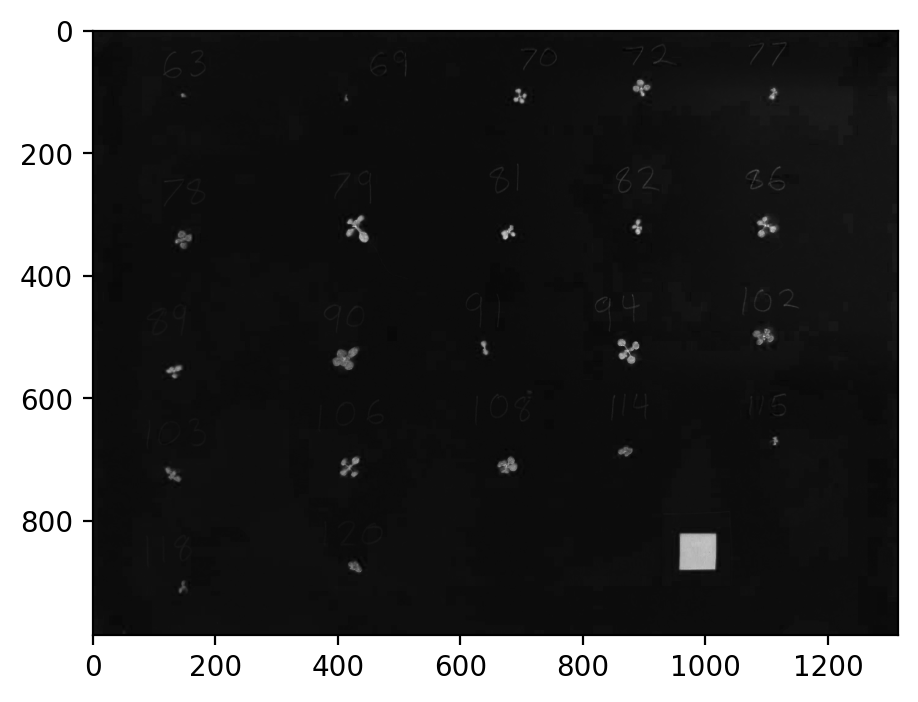

In [3]:
img_bw = pcv.rgb2gray_cmyk(rgb_img=image, channel="c")

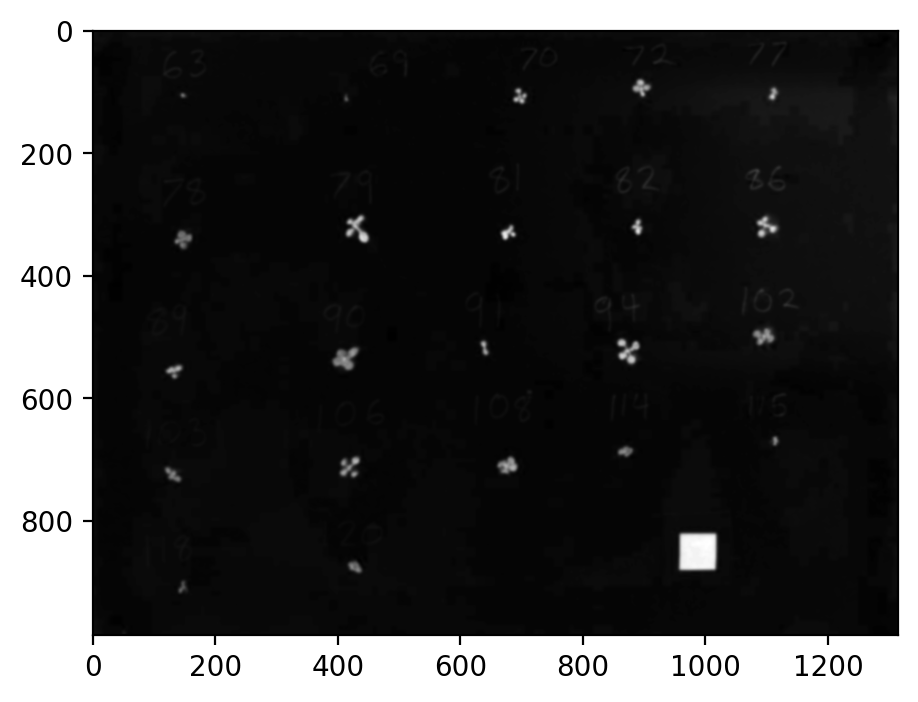

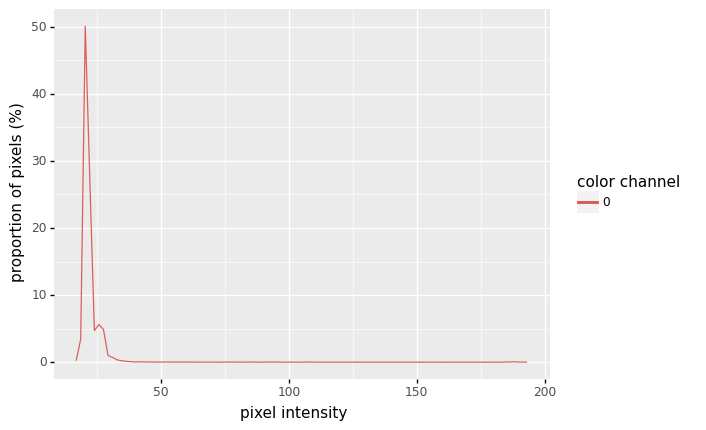

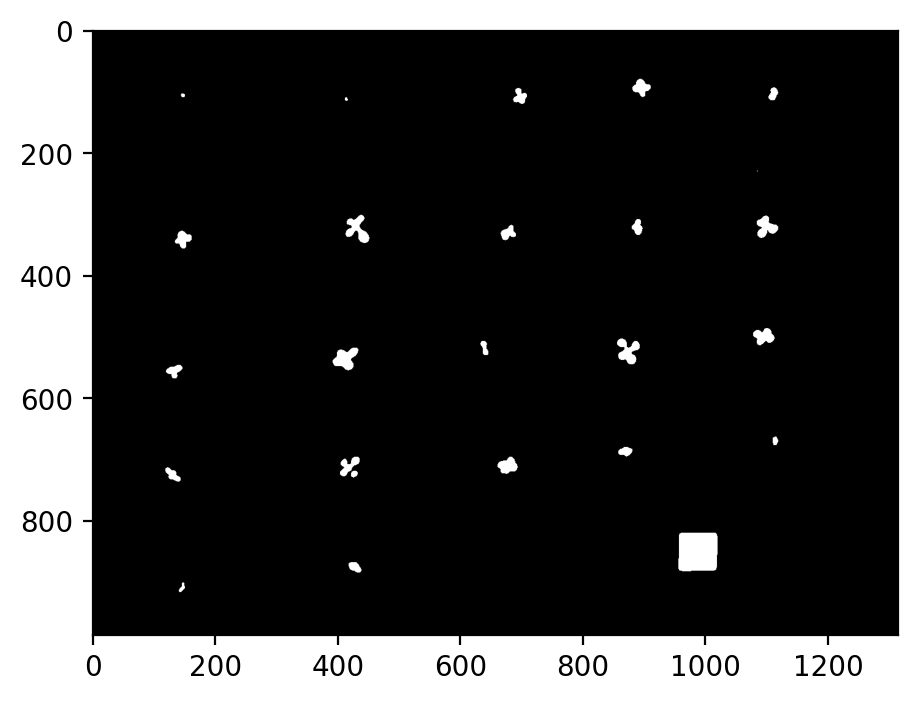

In [4]:
blur = pcv.gaussian_blur(img=img_bw, ksize=(13, 13), sigma_x=2, sigma_y=2)
hist_figure1, hist_data1 = pcv.visualize.histogram(blur, hist_data=True)

thresh = pcv.threshold.binary(gray_img=blur, threshold=58, max_value=255, object_type="light")

In [5]:
#erode = pcv.erode(gray_img=thresh, ksize=7, i=1)

#fill = pcv.fill(bin_img=thresh, size=305)


In [6]:
#erode = pcv.fill_holes(erode)
#dilate = pcv.dilate(gray_img=erode, ksize=7, i=1)
#thresh =dilate

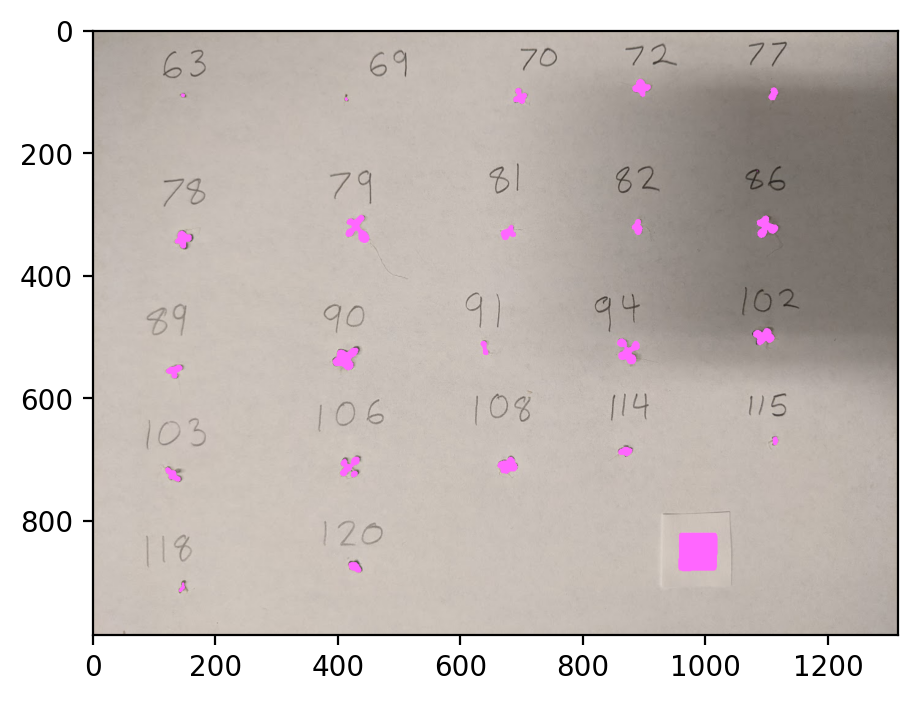

25


In [7]:
id_objects, obj_hierarchy = pcv.find_objects(img=image, mask=thresh)
print(len(obj_hierarchy[0]))

(986, 1315, 3)


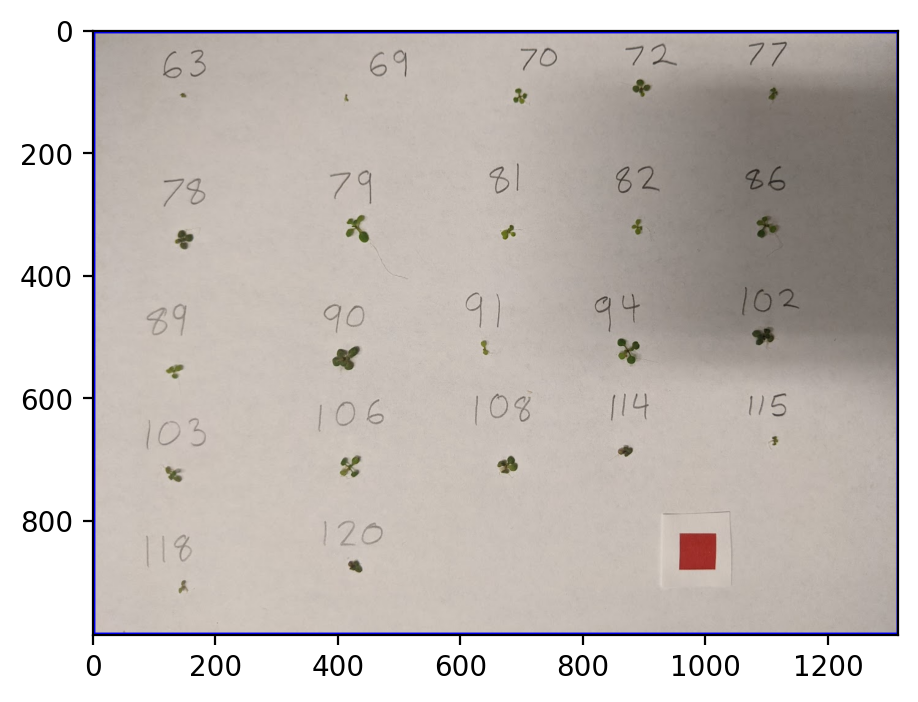

In [8]:
shape = np.shape(image)
print(shape)
roi_contour, roi_hierarchy = pcv.roi.rectangle(img=image, x=0, y=0, h=shape[0], w=shape[1])

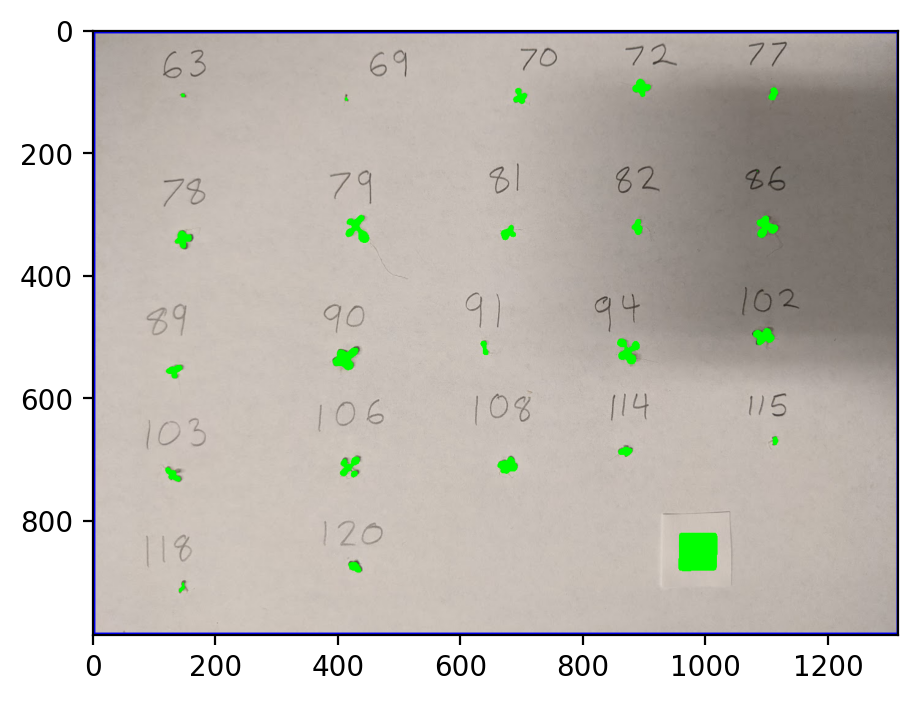

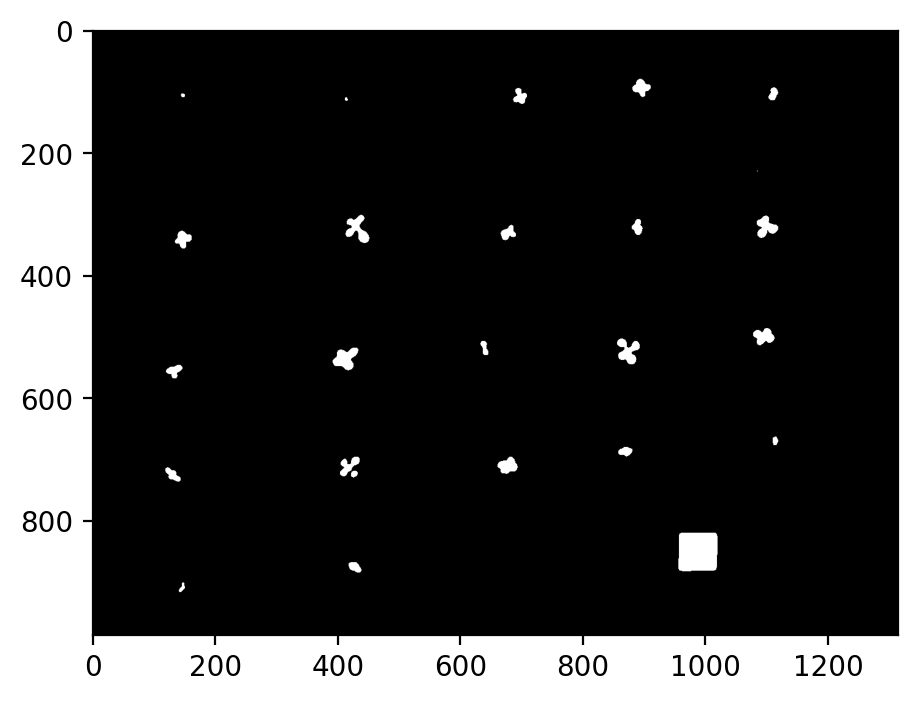

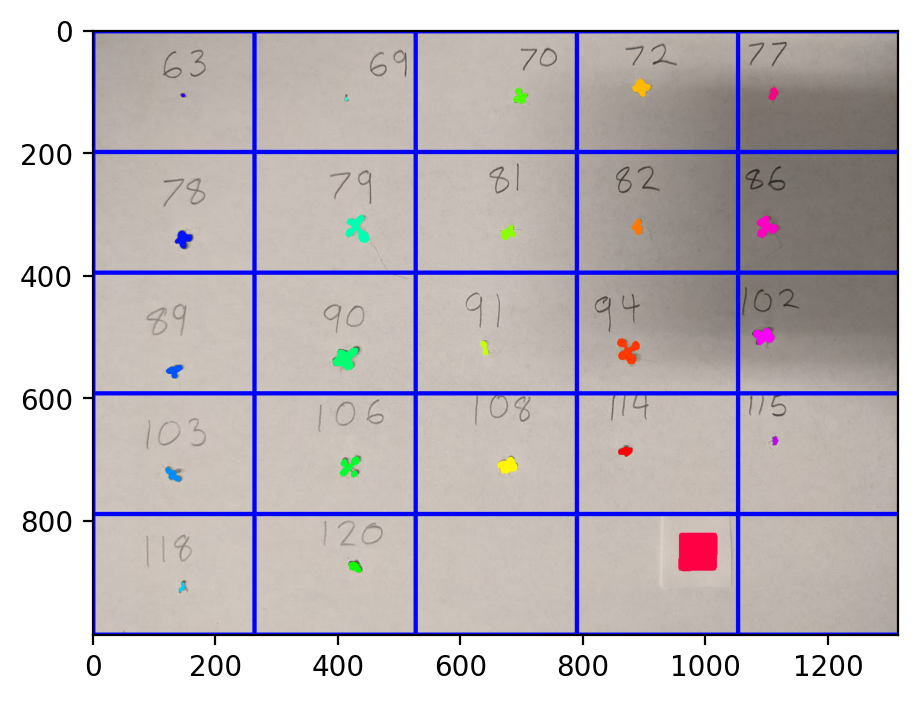

This function has been updated to include object hierarchy so object holes can be included


In [9]:
# gives 4 diff outputs
# list of objs, hierarchies say object or hole w/i object

roi_objects, hierarchy, kept_mask, obj_area = pcv.roi_objects(img=image, 
                                                              roi_contour=roi_contour, roi_hierarchy=roi_hierarchy,
                                                              object_contour=id_objects, obj_hierarchy=obj_hierarchy, roi_type="partial")

# clustering defined leaves into individual plants using predefined rows/cols

clusters_i, contours, hierarchies = pcv.cluster_contours(img=image, roi_objects=roi_objects, 
                                                         roi_obj_hierarchy=hierarchy, nrow=5, ncol=5, show_grid=True)

#clusters_i, contours, hierarchies = cluster_jordan.cluster_contours(img=plate_crop, roi_objects=roi_objects, 
#                                                         roi_obj_hierarchy=hierarchy, nrow=2, ncol=6, show_grid=True)
# split the clusters into individual images for analysis
pcv.params.debug = None
output_path, imgs, masks = pcv.cluster_contour_splitimg(img=image,
                                                        grouped_contour_indexes=clusters_i, contours=contours, 
                                                        hierarchy=hierarchies)
                                            

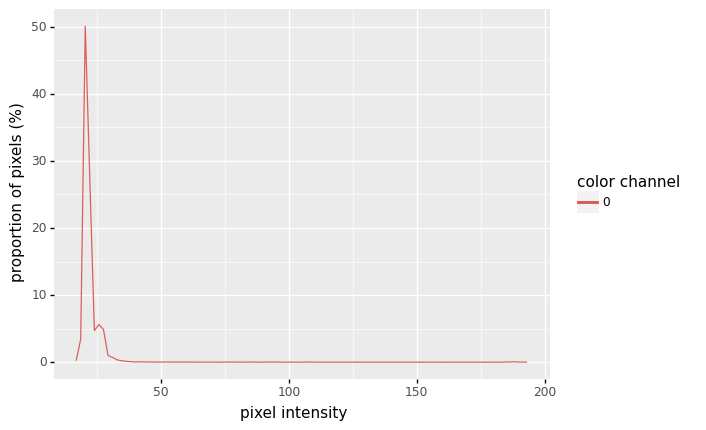

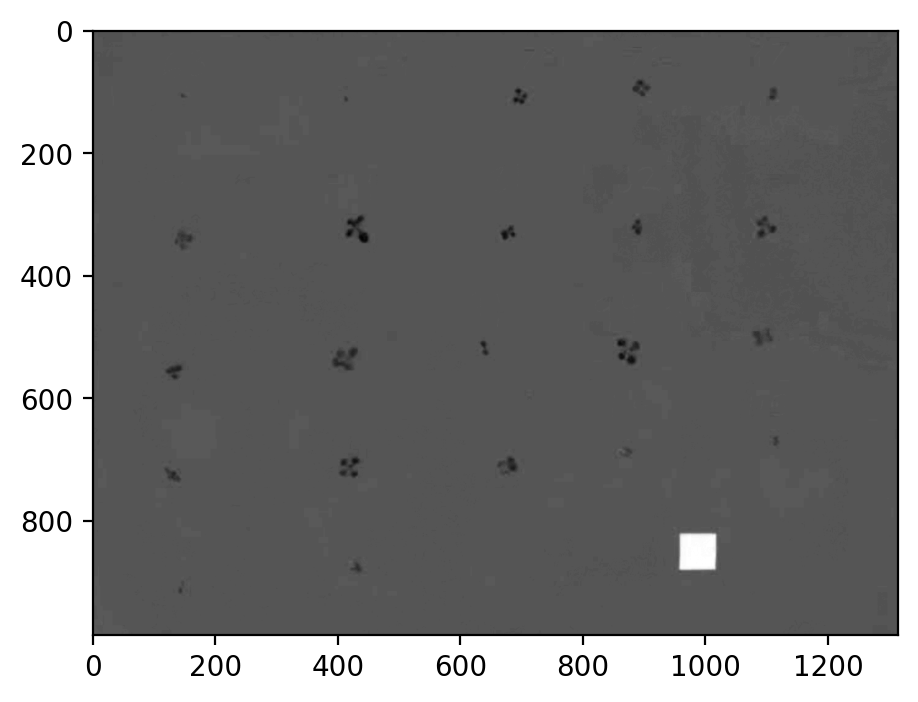

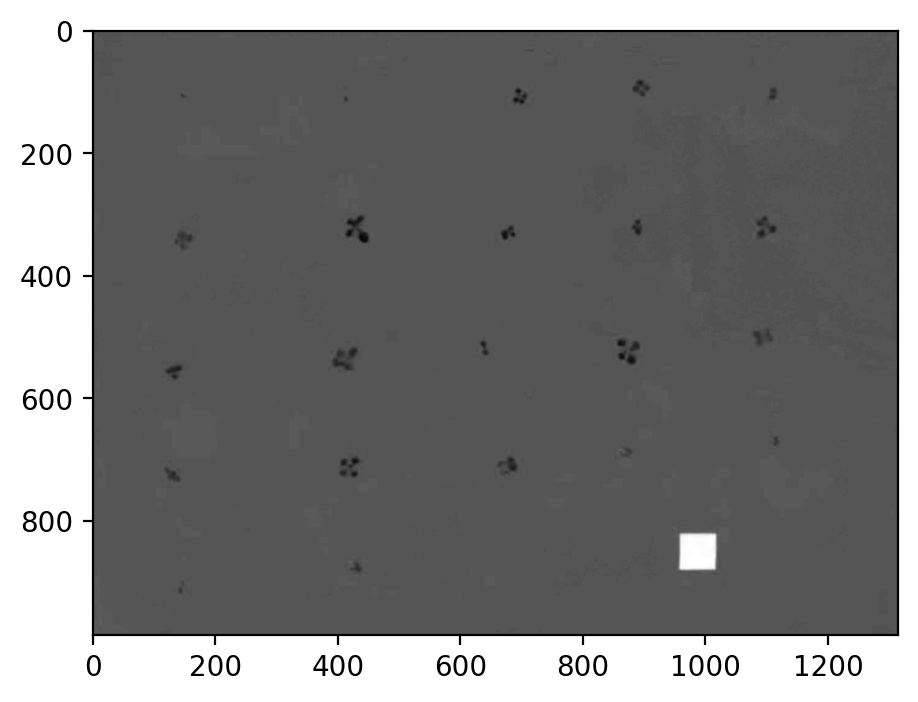

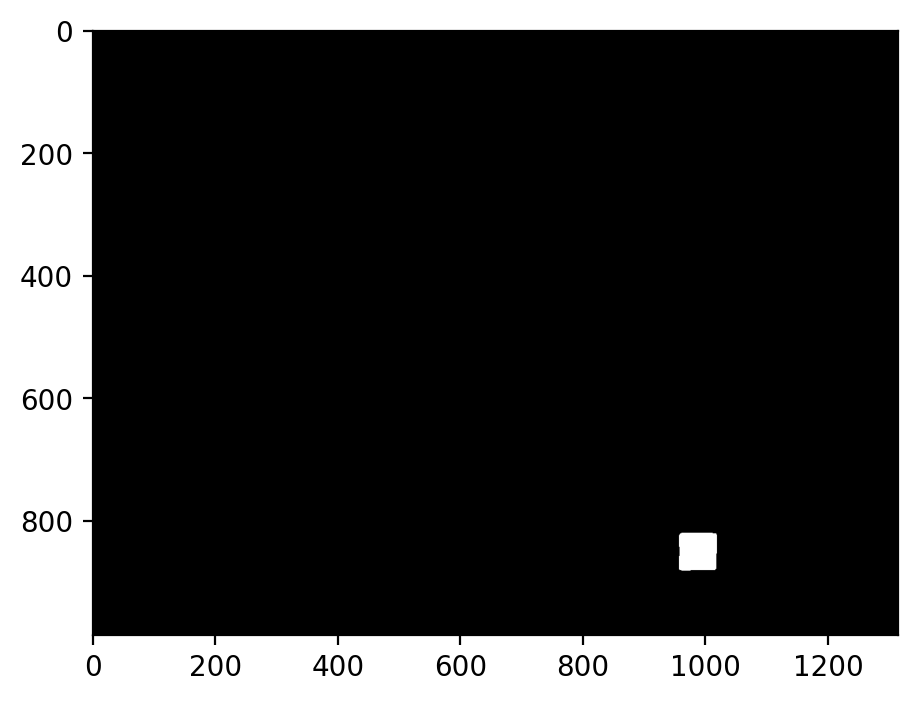

In [10]:
pcv.params.debug = "plot"
hist_figure1, hist_data1 = pcv.visualize.histogram(blur, hist_data=True)
gray_img_scale = img_bw = pcv.rgb2gray_lab(rgb_img=image, channel="a")
blur_scale = pcv.gaussian_blur(img=gray_img_scale, ksize=(13, 13), sigma_x=0.5, sigma_y=0.5)
thresh = pcv.threshold.binary(gray_img=blur_scale, threshold=140, max_value=255, object_type="light")

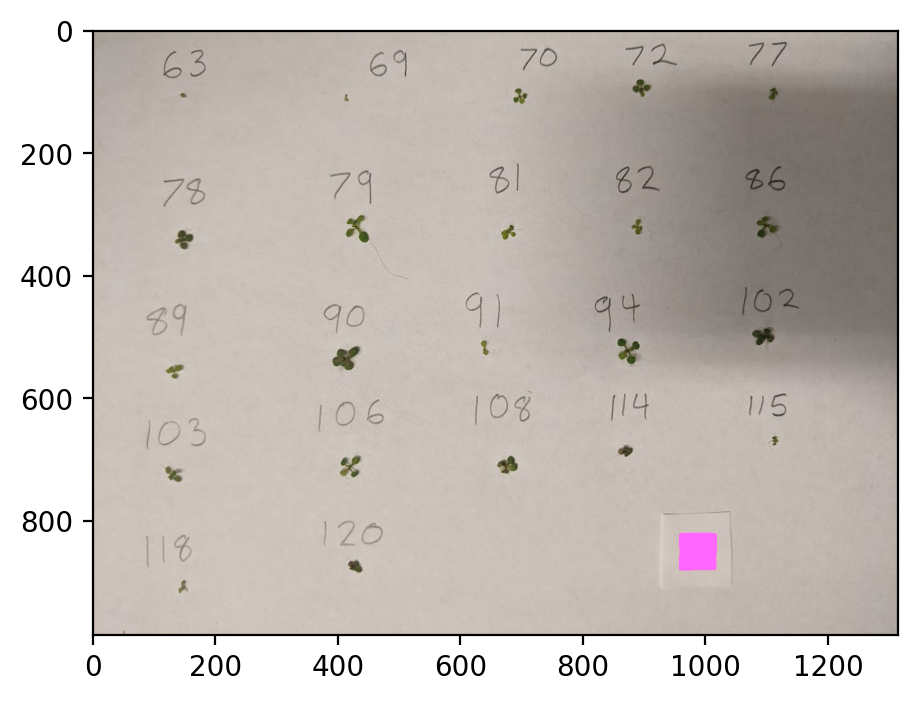

In [11]:
id_objects, obj_hierarchy = pcv.find_objects(img=image, mask=thresh)
#print(len(id_objects))

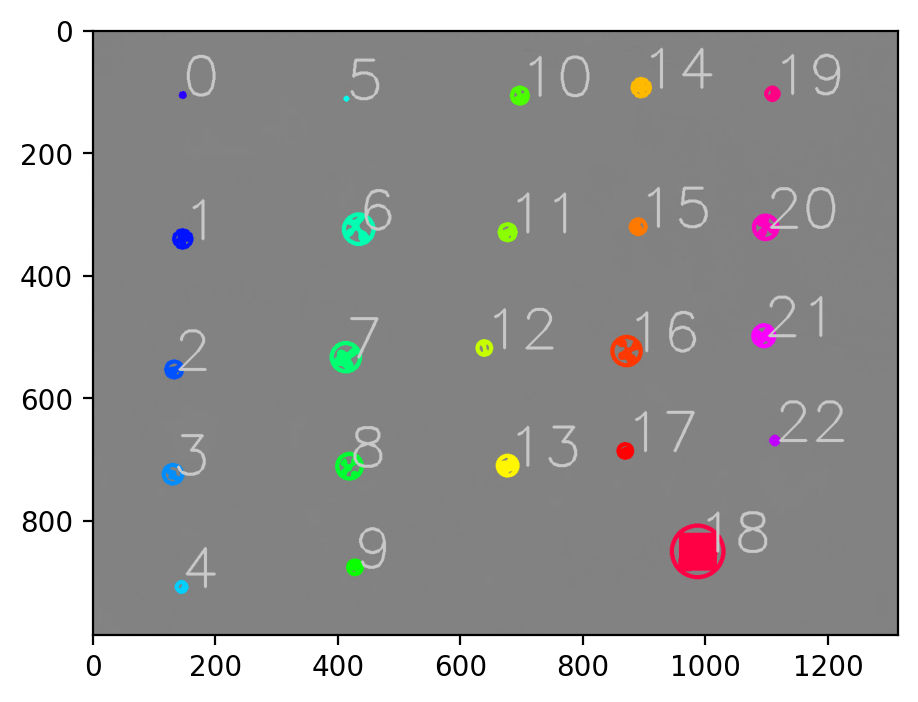

In [12]:
clustered_image = pcv.visualize.clustered_contours(img=blur_scale, grouped_contour_indices=clusters_i, 
                                                   roi_objects=roi_objects,
                                                   roi_obj_hierarchy=hierarchies, bounding=True)

In [13]:

m = cv2.moments(id_objects[0])
scale_pixels = m['m00']
scale_area = 100
pixels_per_mm2 = float(scale_pixels)/scale_area
print(pixels_per_mm2)


36.165


In [14]:
pcv.params.debug = "None"
areas = {}
convertedareas = {}
j=0

for i in clusters_i:
    id_obj, obj_hier = pcv.find_objects(img=imgs[j], mask=masks[j])
    obj, mask1 = pcv.object_composition(img=imgs[j], contours=id_obj, hierarchy=obj_hier)
    m = cv2.moments(obj)
    area = m['m00']
    areas[j]= area
    j+=1

print(areas)
for pos, area in areas.items():
    convertedareas[pos] = area/pixels_per_mm2
print(convertedareas)


{0: 23.5, 1: 433.0, 2: 307.5, 3: 274.0, 4: 66.5, 5: 15.5, 6: 808.0, 7: 875.0, 8: 540.5, 9: 227.5, 10: 324.0, 11: 335.5, 12: 161.0, 13: 564.0, 14: 470.5, 15: 273.5, 16: 809.5, 17: 228.5, 18: 3770.0, 19: 202.5, 20: 677.0, 21: 587.5, 22: 83.5}
{0: 0.649799529932255, 1: 11.972901977049634, 2: 8.502695976773124, 3: 7.5763860085718235, 4: 1.838794414489147, 5: 0.42859117931701923, 6: 22.34204341213881, 7: 24.194663348541408, 8: 14.945389188441863, 9: 6.290612470620766, 10: 8.958938199917046, 11: 9.276925203926448, 12: 4.451818056131619, 13: 15.59518871837412, 14: 13.00981612055855, 15: 7.562560486658372, 16: 22.383519977879164, 17: 6.31826351444767, 18: 104.24443522742983, 19: 5.599336374948154, 20: 18.719756670814323, 21: 16.244988248306374, 22: 2.308862159546523}
